In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers
from tensorflow.keras.datasets import mnist
import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
# Build the model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

def create_simple_nn():
  model = Sequential([
      Flatten(input_shape=(28, 28, 1)),
      Dense(128, activation='relu'),
      Dense(10, activation='softmax')
  ])

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [3]:
def create_cnn():
  model = Sequential([
      layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
      layers.MaxPooling2D(pool_size=2),
      layers.Conv2D(64, kernel_size=3, activation='relu'),
      layers.MaxPooling2D(pool_size=2),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [4]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add channel dimension
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

In [5]:
victim_epochs = 10
victim_batch_size = 128

## Simple_CNN

In [6]:
# Create Simple CNN model
simple_nn_model = create_simple_nn()

c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
history_simple_nn_model = simple_nn_model.fit(
    x_train,
    y_train,
    epochs=victim_epochs,
    batch_size=victim_batch_size,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8000 - loss: 0.7066 - val_accuracy: 0.9417 - val_loss: 0.2139
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9412 - loss: 0.2074 - val_accuracy: 0.9558 - val_loss: 0.1585
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9613 - loss: 0.1422 - val_accuracy: 0.9615 - val_loss: 0.1307
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9698 - loss: 0.1082 - val_accuracy: 0.9665 - val_loss: 0.1129
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9760 - loss: 0.0875 - val_accuracy: 0.9693 - val_loss: 0.1057
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9815 - loss: 0.0686 - val_accuracy: 0.9686 - val_loss: 0.1044
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9834 - loss: 0.0599 - val_accuracy: 0.9714 - val_loss: 0.0954
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9859 - loss: 0.0496 - val_accuracy: 0.

In [8]:
simple_nn_model.save("victim_simple_cnn_model.keras")

In [9]:
loss, acc = simple_nn_model.evaluate(x_test, y_test)
print(f"Victim Model Accuracy On Test Set: {acc * 100.0:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9728 - loss: 0.0857
Victim Model Accuracy On Test Set: 97.65%


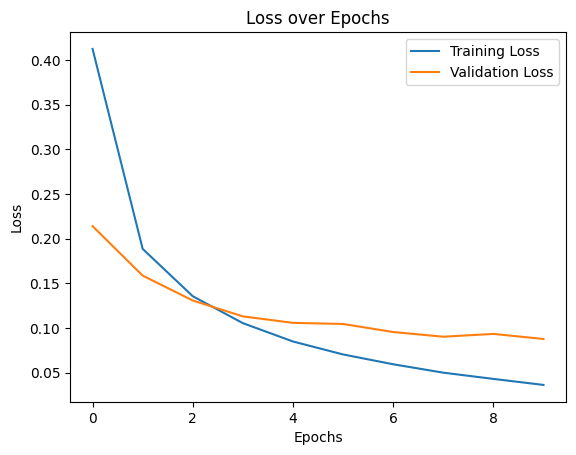

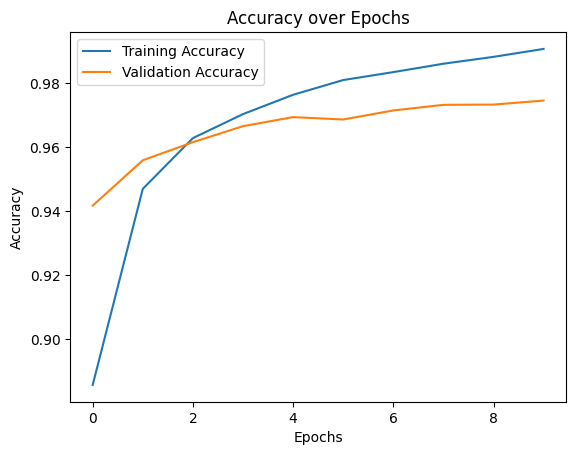

In [10]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history_simple_nn_model.history['loss'], label='Training Loss')
plt.plot(history_simple_nn_model.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history_simple_nn_model.history['accuracy'], label='Training Accuracy')
plt.plot(history_simple_nn_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Convolutional CNN

In [11]:
# Define victim model
c_nn_model = create_cnn()

c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Train victim model
history_c_nn_model = c_nn_model.fit(
    x_train,
    y_train,
    epochs=victim_epochs,
    batch_size=victim_batch_size,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.8434 - loss: 0.5368 - val_accuracy: 0.9783 - val_loss: 0.0777
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9787 - loss: 0.0682 - val_accuracy: 0.9844 - val_loss: 0.0561
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9871 - loss: 0.0439 - val_accuracy: 0.9868 - val_loss: 0.0443
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9896 - loss: 0.0328 - val_accuracy: 0.9873 - val_loss: 0.0427
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9924 - loss: 0.0238 - val_accuracy: 0.9868 - val_loss: 0.0473
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9939 - loss: 0.0190 - val_accuracy: 0.9899 - val_loss: 0.0356
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9949 - loss: 0.0151 - val_accuracy: 0.9911 - val_loss: 0.0365
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9965 - loss: 0.0114 - 

In [13]:
c_nn_model.save("victim_cnn_model.keras")

In [14]:
# Evaluate victim model
loss, acc = c_nn_model.evaluate(x_test, y_test)
print(f"Victim Model Accuracy On Test Set: {acc * 100.0:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9880 - loss: 0.0420
Victim Model Accuracy On Test Set: 99.02%


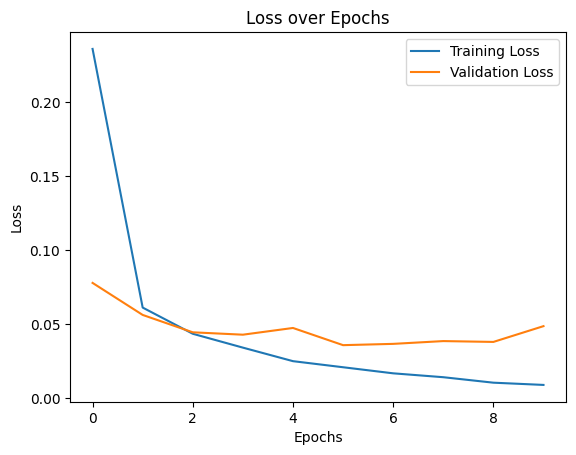

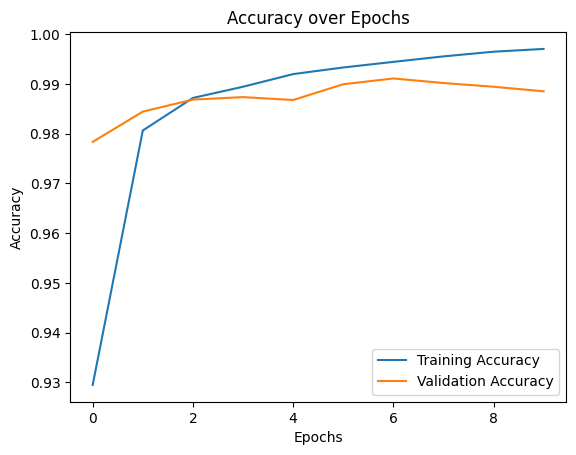

In [15]:
# Accessing and Displaying Training History
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history_c_nn_model.history['loss'], label='Training Loss')
plt.plot(history_c_nn_model.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history_c_nn_model.history['accuracy'], label='Training Accuracy')
plt.plot(history_c_nn_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## GAN-based attack

### Train GAN

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd

# Define generator model
def build_generator(z_dim):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_dim=z_dim),
        layers.Dense(256, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(28 * 28, activation='tanh'),
        layers.Reshape((28, 28, 1))
    ])
    return model

# Define attack function
def attack_model(victim_model_path, z_dim=100, target_label=3, epochs=1000, batch_size=16):
    generator = build_generator(z_dim)
    log_data = []

    # Load victim model
    victim_model = tf.keras.models.load_model(victim_model_path)

    # Loss and optimizer
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    optimizer = tf.keras.optimizers.Adam(0.0001)
    target_label_tensor = tf.constant([target_label] * batch_size)

    print(f"Victim: {victim_model_path}: ")

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            # Sample random noise
            z = tf.random.normal([batch_size, z_dim])

            # Generate images
            generated_images = generator(z)

            # Get victim model predictions
            predictions = victim_model(generated_images)

            # Compute loss
            target_loss = loss_fn(target_label_tensor, predictions)
            reg_loss = tf.reduce_mean(tf.square(generated_images - 0.5))
            loss = target_loss + 0.1 * reg_loss

            # Log statistics
            log_data.append({
                "Epoch": epoch + 1,
                "Total Loss": loss.numpy(),
                "Target Loss": target_loss.numpy(),
                "Regularization Loss": reg_loss.numpy()
            })

        # Backpropagation
        gradients = tape.gradient(loss, generator.trainable_variables)
        optimizer.apply_gradients(zip(gradients, generator.trainable_variables))

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.numpy():.4f}")

    # Save the generator and log
    generator.save(f"generator_inversion_attack_{victim_model_path.split('.')[0]}.keras")
    df_log = pd.DataFrame(log_data)
    df_log.to_csv(f"attack_log_{victim_model_path.split('.')[0]}.csv", index=False)
    print(f"Attack log saved to attack_log_{victim_model_path.split('.')[0]}.csv")


# Define dim laten vector
z_dim=100
target_label=3

# Example usage for different models
attack_model("victim_simple_cnn_model.keras", z_dim=z_dim, target_label=target_label)
attack_model("victim_cnn_model.keras", z_dim=z_dim, target_label=target_label)

c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\nn.py:678: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Victim: victim_simple_cnn_model.keras: 
Epoch [1/1000], Loss: 3.0253
Epoch [2/1000], Loss: 1.8749
Epoch [3/1000], Loss: 0.8430
Epoch [4/1000], Loss: 0.2629
Epoch [5/1000], Loss: 0.2779
Epoch [6/1000], Loss: 0.1040
Epoch [7/1000], Loss: 0.0398
Epoch [8/1000], Loss: 0.0427
Epoch [9/1000], Loss: 0.0291
Epoch [10/1000], Loss: 0.0302
Epoch [11/1000], Loss: 0.0293
Epoch [12/1000], Loss: 0.0284
Epoch [13/1000], Loss: 0.0284
Epoch [14/1000], Loss: 0.0281
Epoch [15/1000], Loss: 0.0283
Epoch [16/1000], Loss: 0.0279
Epoch [17/1000], Loss: 0.0283
Epoch [18/1000], Loss: 0.0284
Epoch [19/1000], Loss: 0.0282
Epoch [20/1000], Loss: 0.0280
Epoch [21/1000], Loss: 0.0281
Epoch [22/1000], Loss: 0.0285
Epoch [23/1000], Loss: 0.0283
Epoch [24/1000], Loss: 0.0281
Epoch [25/1000], Loss: 0.0282
Epoch [26/1000], Loss: 0.0278
Epoch [27/1000], Loss: 0.0283
Epoch [28/1000], Loss: 0.0283
Epoch [29/1000], Loss: 0.0280
Epoch [30/1000], Loss: 0.0280
Epoch [31/1000], Loss: 0.0279
Epoch [32/1000], Loss: 0.0278
Epoch [33

In [18]:
# Convert log data to DataFrame
df = pd.read_csv("attack_log_victim_simple_cnn_model.csv")
df

,Epoch,Total Loss,Target Loss,Regularization Loss
0,1,3.025267,2.997696,0.275713
1,2,1.874856,1.846366,0.284902
2,3,0.842972,0.815616,0.273567
3,4,0.262936,0.235242,0.276945
4,5,0.277918,0.250345,0.275731
...,...,...,...,...
995,996,0.001079,0.000024,0.010549
996,997,0.001384,0.000021,0.013635
997,998,0.001370,0.000021,0.013493
998,999,0.001290,0.000013,0.012770


In [19]:
df = pd.read_csv("attack_log_victim_cnn_model.csv")
df

,Epoch,Total Loss,Target Loss,Regularization Loss
0,1,2.683288,2.654600,0.286884
1,2,2.067380,2.039560,0.278197
2,3,0.927062,0.898655,0.284067
3,4,0.625898,0.597518,0.283796
4,5,0.278858,0.250993,0.278651
...,...,...,...,...
995,996,0.002079,0.000051,0.020280
996,997,0.002051,0.000089,0.019621
997,998,0.002006,0.000064,0.019415
998,999,0.002047,0.000073,0.019736


### Reconstruct

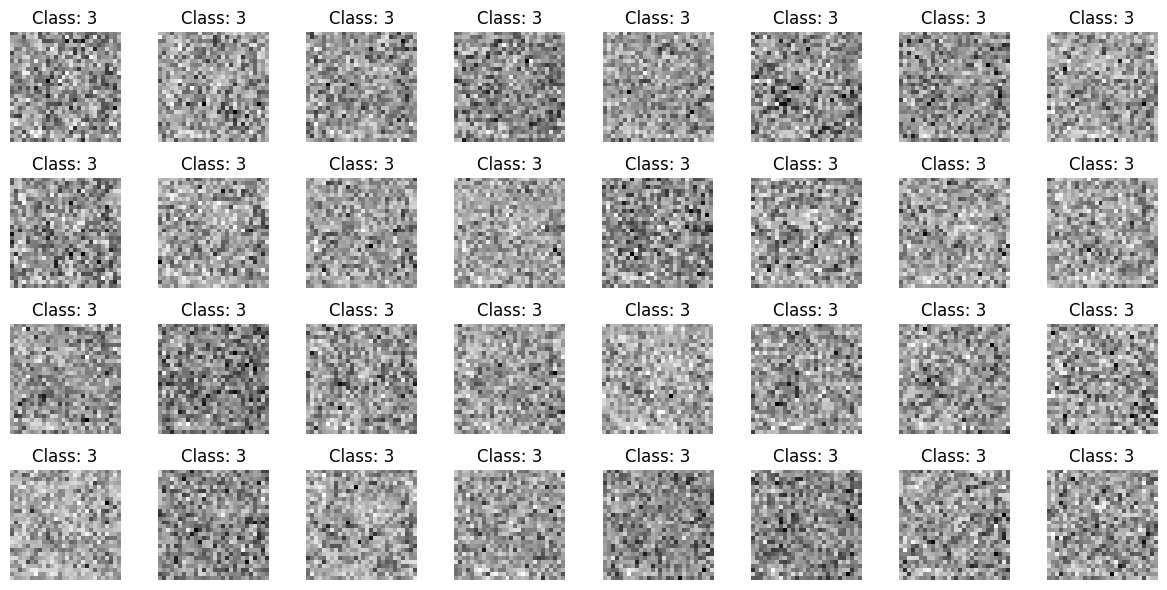

In [21]:
import matplotlib.pyplot as plt

generator_model = tf.keras.models.load_model("generator_inversion_attack_victim_simple_cnn_model.keras")

# Generate and visualize reconstructed images
z = tf.random.normal([32, z_dim])
generated_images = generator_model(z).numpy()

# Plot generated images
fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(generated_images[i, :, :, 0], cmap='gray')
    ax.set_title(f"Class: {target_label}")
    ax.axis('off')
plt.tight_layout()
plt.show()

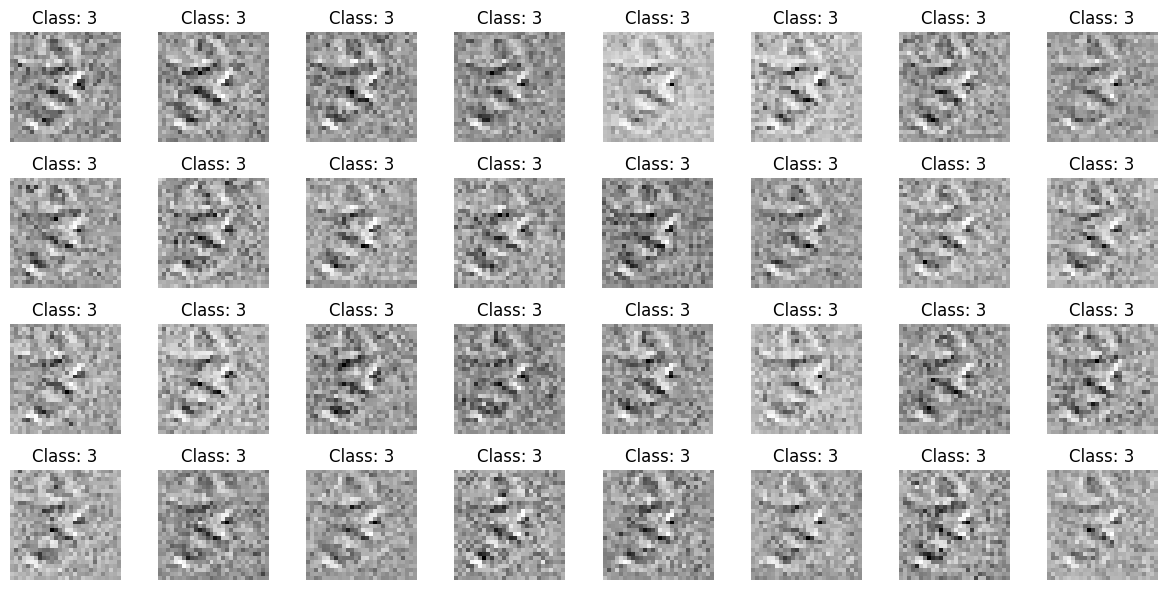

In [22]:
import matplotlib.pyplot as plt

generator_model = tf.keras.models.load_model("generator_inversion_attack_victim_cnn_model.keras")

# Generate and visualize reconstructed images
z = tf.random.normal([32, z_dim])
generated_images = generator_model(z).numpy()

# Plot generated images
fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(generated_images[i, :, :, 0], cmap='gray')
    ax.set_title(f"Class: {target_label}")
    ax.axis('off')
plt.tight_layout()
plt.show()

## Defenses